# Churn Prediction

The data is about customers subscribed to a service at a company. We can do some analysis with the data and use it to predicting **customer churn**. The dataset contains some features like:
- RowNumber: Number of rows
- CustomerId: The unique ID for each customer
- Surname: Customer surname
- CreditScore: The credit score of the customer
- Geography: The country where customer live
- Gender: The gender of the customer
- Age:  The age of customers
- Tenure: The number of months that a customers subscribed the service
- Balance: The balance that customer has
- NumOfProducts: How many products that customer use
- HasCrCard: The customers has a credit card or not
- IsActiveMember: The customer is an active member of the company or not
- EstimatedSalary: The estimated of customer salary
- Exited: 0 mean Not Churn and 1 mean Churn

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

## Load Dataset 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# check null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no any null or missing values in the dataset and from the dataset we can see that some features such as RowNumber, CustomerId, and Surname are only limited to showing data, not generating certain insights or stats. So we can remove them.

In [5]:
# drop unused features
df_old = df.copy()

A new dataframe with no unused features

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# descrribe primary statistic of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## Exploratory Data Analysis 

### Features Distributions
To see the distribution of data from each features

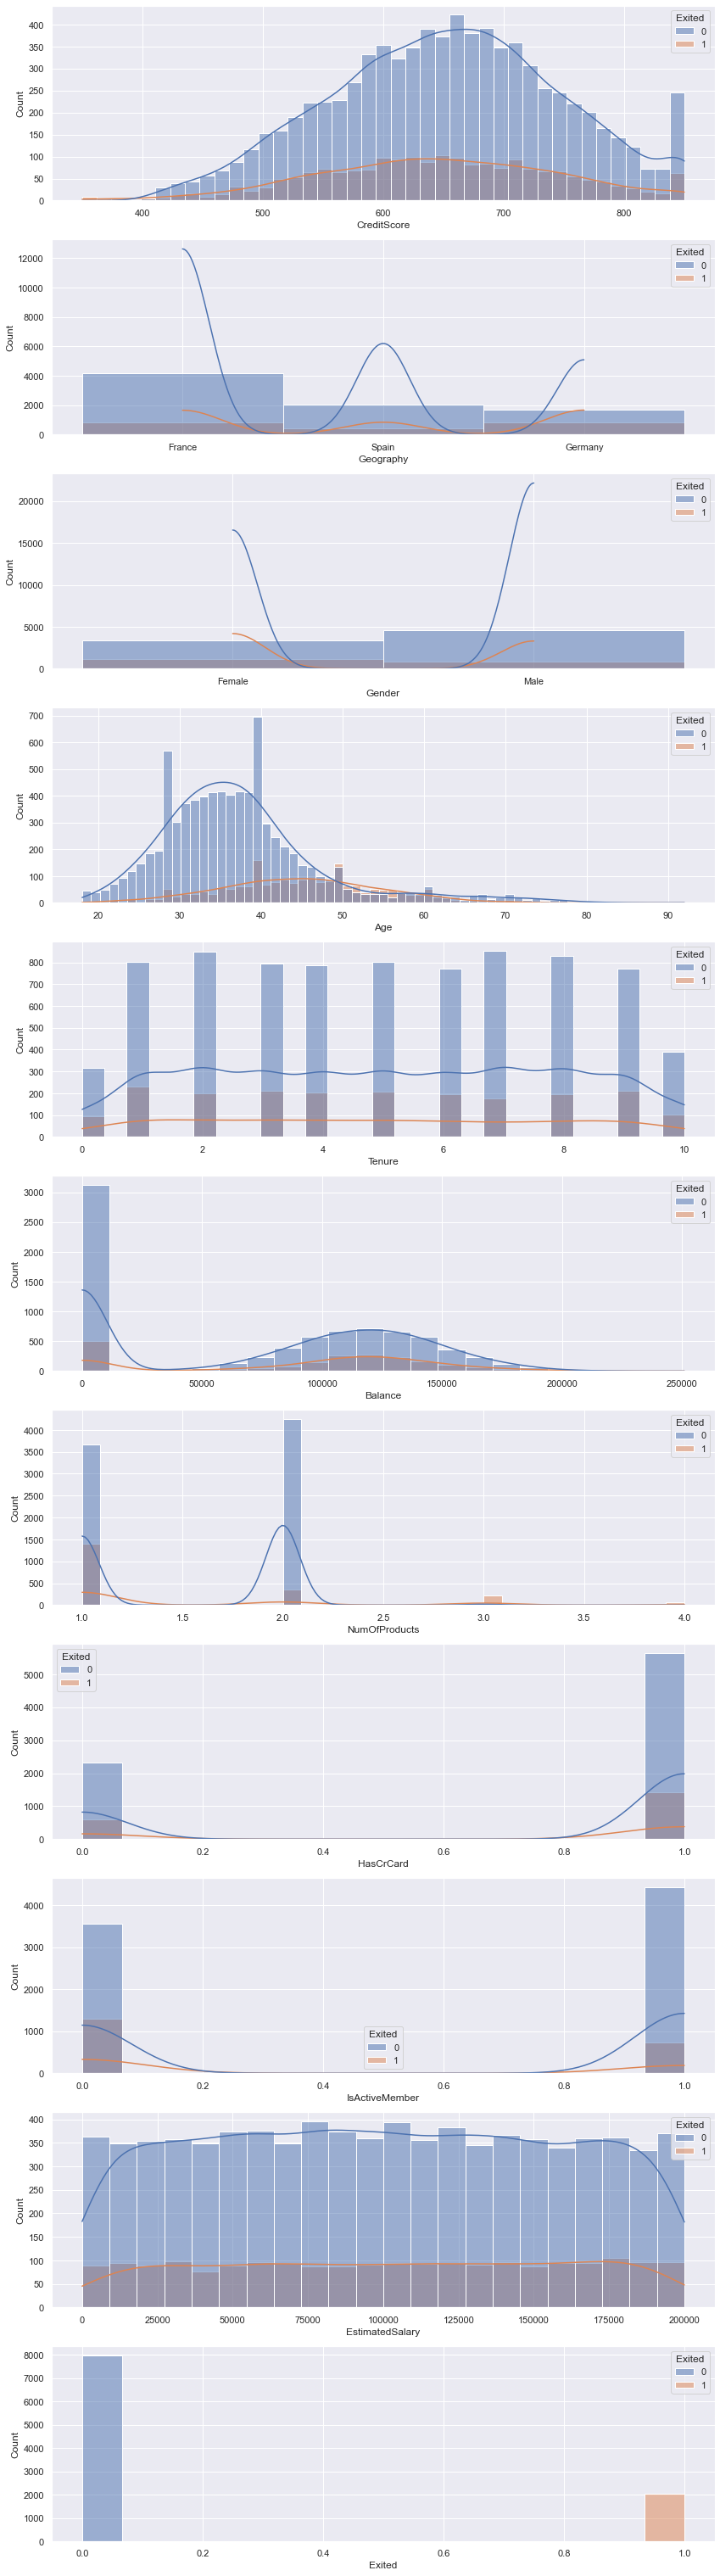

In [8]:
fig, axs = plt.subplots(11, 1, figsize=(14,55))
for idx, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, hue='Exited', kde=True, ax=axs.flat[idx])

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

From the graphs above we can see that our dataset is an imbalance dataset becase the number of class in Exited feature is not balance.

### Correlation Heatmap
To see linear relationship between features 

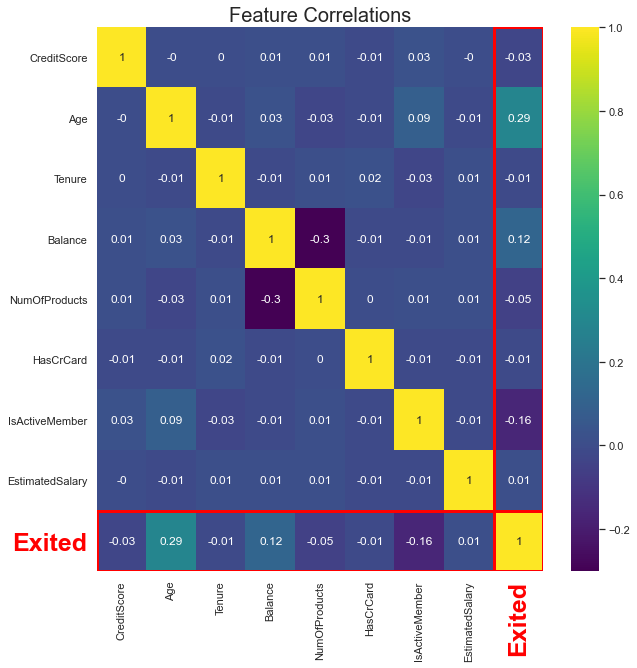

In [10]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr().round(2),ax=ax, annot=True, cmap='viridis')
highlight_color ='red'
ax.add_patch(Rectangle((0,8), 9, 1, fill=False, edgecolor=highlight_color, lw=3))
ax.add_patch(Rectangle((8,0), 1, 9, fill=False, edgecolor=highlight_color, lw=3))
ax.set_title("Feature Correlations", fontsize=20)

for axis in [ax.get_xticklabels(), ax.get_yticklabels()]:
    label = [i for i in axis if i.get_text() == 'Exited']
    [(l.set_weight('bold'), l.set_size(25), l.set_color(highlight_color)) for l in label]

From the correlation heatmap above, the Age feature has the highest correlation with the Exited feature. What does it mean? Its mean that the older the customer the more likely he/she to churn

## Proportion of Target From Each Features 
To see the trend of each features against the Target

In [11]:
def feature_bar_graph(values, title, xlab, ylab='Proportion of Exited', rotate_x=False):
    temp_df = pd.DataFrame({'Feature': values, 'Exited': df['Exited']})
    gb_obj = temp_df.groupby('Feature')['Exited'].mean()
    plt.figure(figsize=(10,7))
    plt.bar(gb_obj.index.astype(str), gb_obj.values, width=0.5)
    plt.title(title, fontsize=15)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if rotate_x:
        plt.xticks(rotation=45)

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

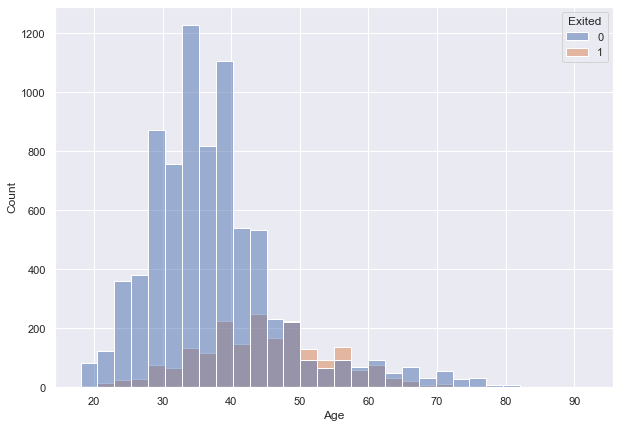

In [12]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age', data=df, hue='Exited', bins=30)

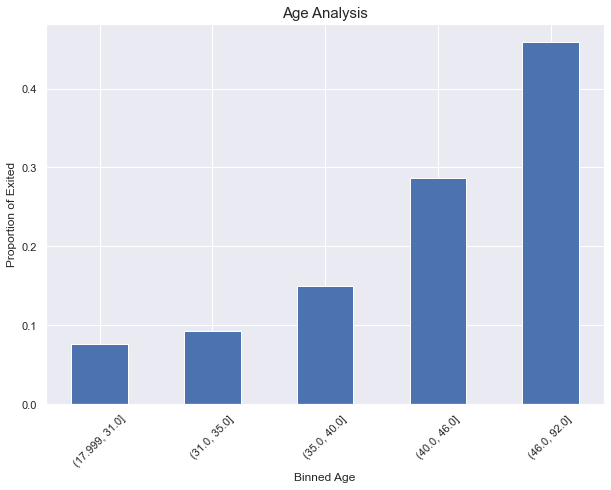

In [13]:
bin_age=pd.qcut(df['Age'].values, q=5).astype(str)
feature_bar_graph(bin_age, 'Age Analysis', 'Binned Age', rotate_x=True)

From the graph above the Age feature is positively correlates with customer churn. We have binned the data and can observe that the bins with higher Age have a larger proportion of customers churning.

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

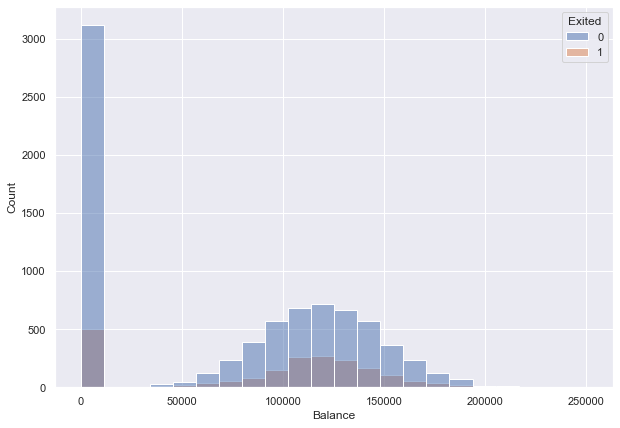

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(x='Balance', data=df, hue='Exited')

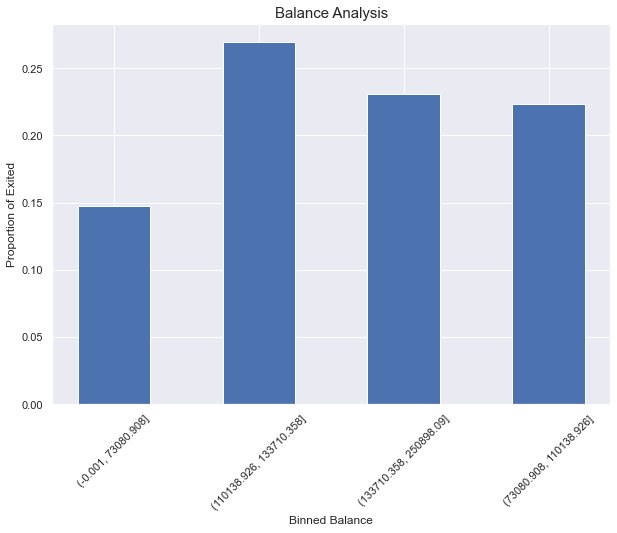

In [15]:
bin_balance=pd.qcut(df['Balance'].values, q=5, duplicates='drop').astype(str)
feature_bar_graph(bin_balance, 'Balance Analysis', 'Binned Balance', rotate_x=True)

There are no significant differences between any of the values. The increase in the amount of churn from the first bar to the second bar is quite significant but then from the second bar to the third bar it decreases, and also from the third bar to the fourth bar is also reduced. We can't see any trend from this feature

### Tenure 

<AxesSubplot:xlabel='Tenure', ylabel='count'>

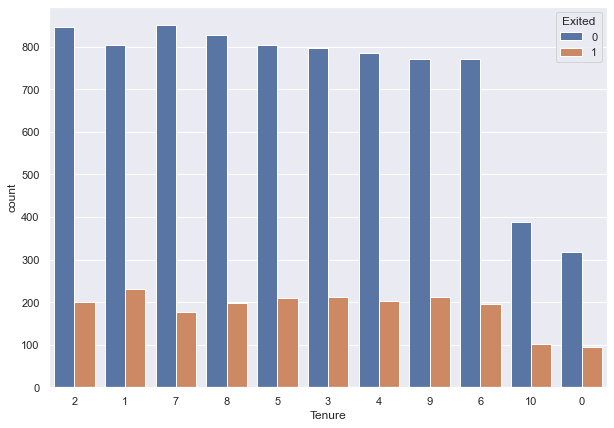

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='Tenure', data=df, hue='Exited', order=df['Tenure'].value_counts().index)

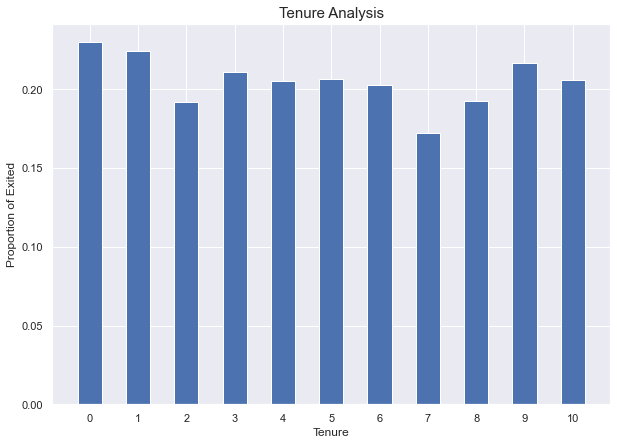

In [17]:
feature_bar_graph(df['Tenure'].values, 'Tenure Analysis', 'Tenure')

Tenure doesn't seem to show any trends when it comes to churn. The proportions are roughly the same for each of the values.

### Has Credit Card 

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

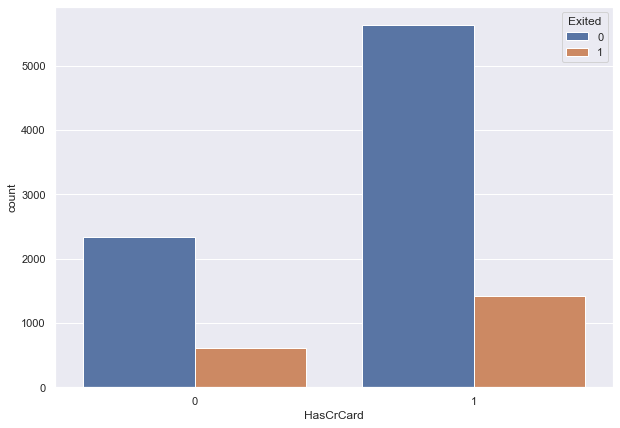

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='HasCrCard', data=df, hue='Exited')

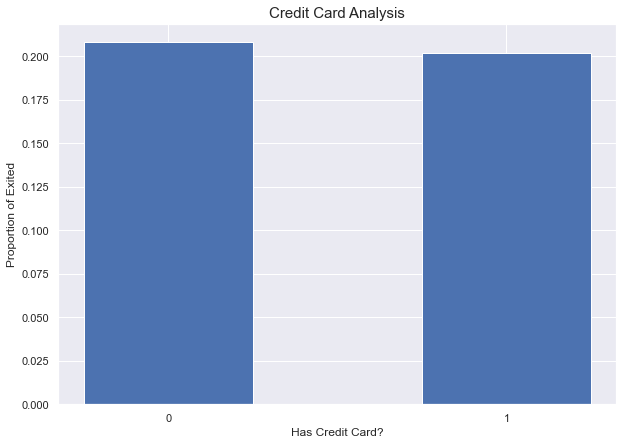

In [19]:
feature_bar_graph(df['HasCrCard'].values, 'Credit Card Analysis', 'Has Credit Card?')

We see the same thing when we look at HasCrCard. There is no significant difference between any of the values. The height of the bars is about the same.

## Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

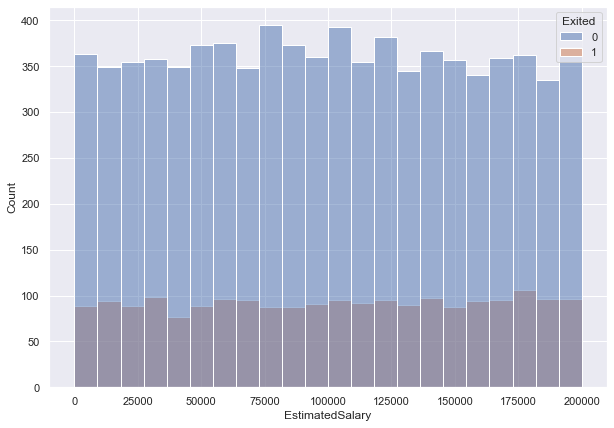

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(x='EstimatedSalary', data=df, hue='Exited')

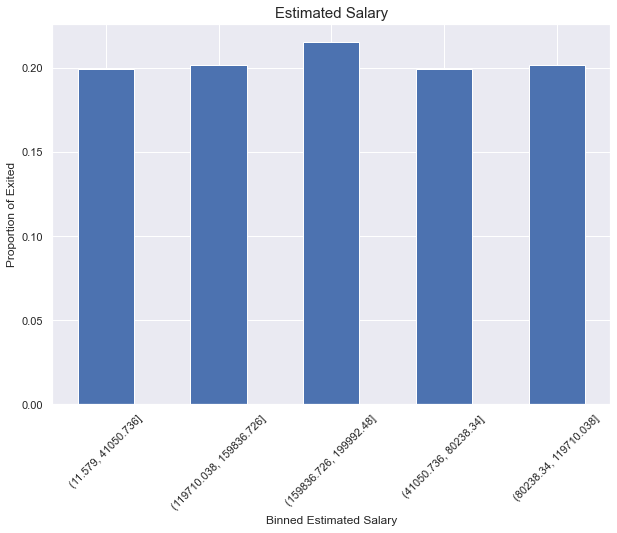

In [21]:
bin_EstSalary = pd.qcut(df['EstimatedSalary'].values, q=5).astype(str)
feature_bar_graph(bin_EstSalary, 'Estimated Salary', 'Binned Estimated Salary', rotate_x=True)

Looking at EstimatedSalary, the trend continues and there are no differences in the values.

### Credit Score 

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

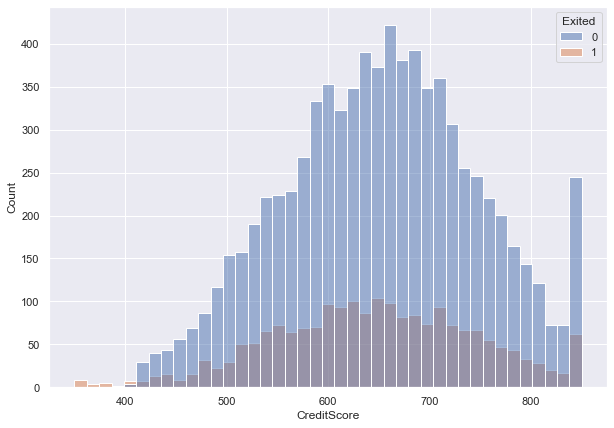

In [22]:
plt.figure(figsize=(10,7))
sns.histplot(x='CreditScore', data=df, hue='Exited')

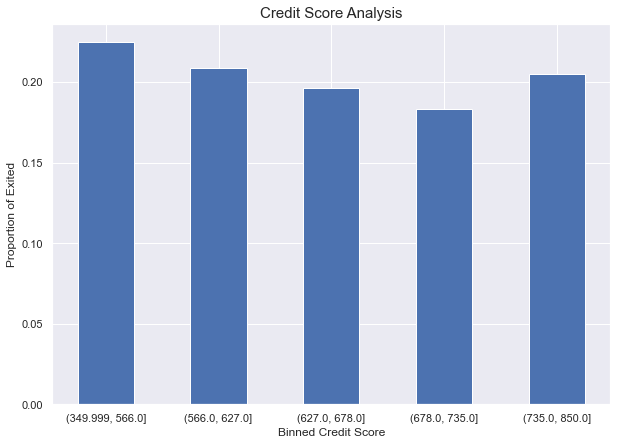

In [23]:
bin_CreditScore = pd.qcut(df['CreditScore'].values, q=5).astype(str)
feature_bar_graph(bin_CreditScore, 'Credit Score Analysis', 'Binned Credit Score')

We see the same thing when we look at CreditScore. There is no notable difference between any of the values.

### Num of Products 

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

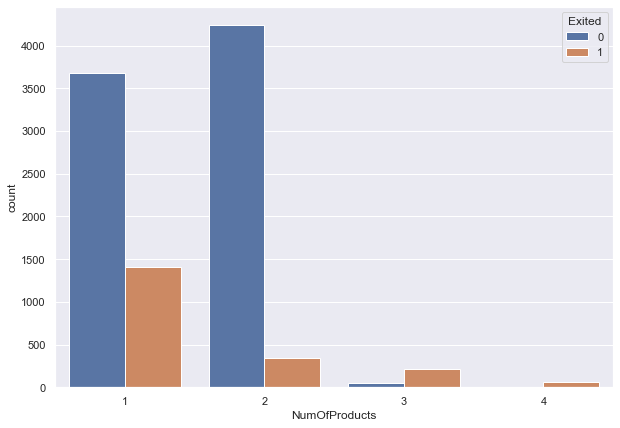

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x='NumOfProducts', data=df, hue='Exited', order=df['NumOfProducts'].value_counts().index)

In [25]:
# print('Num of Products: 3')
# print('Exited = 0 : ', df[(df['NumOfProducts']==3) & (df['Exited']==0)]['Exited'].count())
# print('Exited = 1: ', df[(df['NumOfProducts']==3) & (df['Exited']==1)]['Exited'].count())

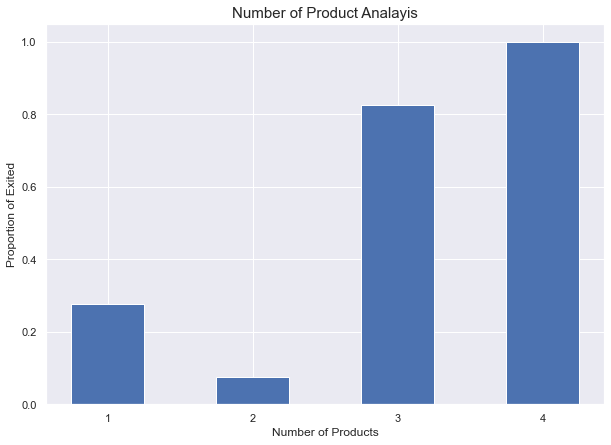

In [26]:
feature_bar_graph(df['NumOfProducts'], 'Number of Product Analayis', 'Number of Products')

We can see the trend in the Number Of Products feature. The number of proportions decreased in the first two columns but increased significantly in the third and fourth.

### Active Member

In [27]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

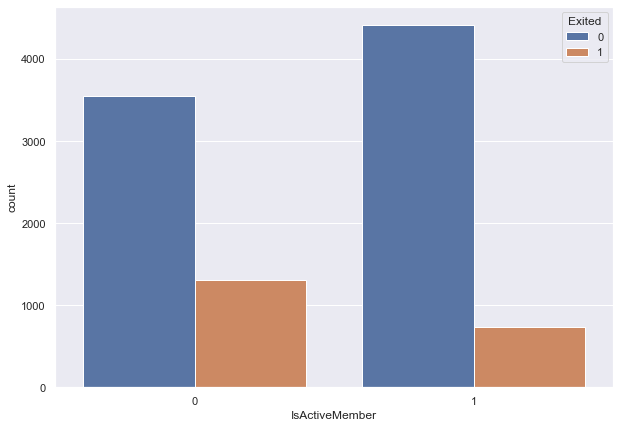

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x='IsActiveMember', data=df, hue='Exited')

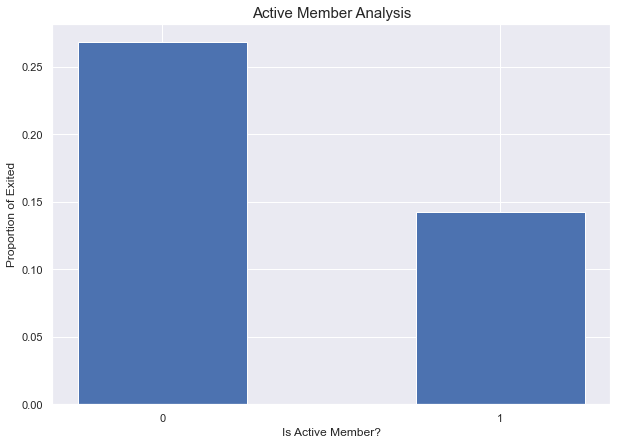

In [29]:
feature_bar_graph(df['IsActiveMember'], 'Active Member Analysis', 'Is Active Member?')

Looking at IsActiveMember we can see that being inactive is correlated to customer churn.

## Modelling 

### Encoding Features, Independent & Dependent  

The categorical features like Geography and Gender are going to bo encoded using One Hot Encoder

In [30]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [31]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### Model 1 

In [32]:
# machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
rs = {'random_state': 42}

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report, confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, **rs)
X_val, X_test, y_val, y_test, = train_test_split(X_test, y_test, train_size=0.5, **rs)

For this training run we will use 5-fold cross validation using cross_val_score. All tree based models will have a random seed to ensure reproducibility.

In [34]:
def training_model(X_train, X_val, X_test, y_train, y_val, y_test):
    log_reg = LogisticRegression(**rs)
    nb = GaussianNB()
    svm = SVC(**rs)
    dt = DecisionTreeClassifier(**rs)
    rf = RandomForestClassifier(**rs)
    xgb = XGBClassifier(**rs,verbosity=0)
    scorer = make_scorer(f1_score)

    classifiers = [('Logistic Regression', log_reg), ('Naive Bayes', nb),
                  ('SVM', svm), ('Decision Tree', dt),
                  ('Random Forest', rf), ('XGBOOST', xgb)]
    pipelines = []
    scores_df = pd.DataFrame(columns=['model', 'val_score', 'test_score'])
    test_scores = []
    for clf_name, clf in classifiers:
        pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),('classifier', clf)])
        pipeline.fit(X_train, y_train)
        val_score = cross_val_score(pipeline, X_val, y_val, scoring=scorer, cv=5).mean()
        print(f'{clf_name}\n{"-" * 30}\nModel Score Validation: {val_score:.4f}')
        test_score = f1_score(y_test, pipeline.predict(X_test))
        print(f'Model Score Testing: {test_score:.4f}\n\n')
        pipelines.append(pipeline)
        scores_df = scores_df.append({'model': clf_name, 'val_score': val_score, 'test_score': test_score}, ignore_index=True)
    
    return pipelines, scores_df


In [35]:
pipelines1, score1 = training_model(X_train, X_val, X_test, y_train, y_val, y_test)

Logistic Regression
------------------------------
Model Score Validation: 0.2052
Model Score Testing: 0.2998


Naive Bayes
------------------------------
Model Score Validation: 0.4044
Model Score Testing: 0.4674


SVM
------------------------------
Model Score Validation: 0.1113
Model Score Testing: 0.4000


Decision Tree
------------------------------
Model Score Validation: 0.5027
Model Score Testing: 0.5169


Random Forest
------------------------------
Model Score Validation: 0.5302
Model Score Testing: 0.5825


XGBOOST
------------------------------
Model Score Validation: 0.5579
Model Score Testing: 0.5845




In [36]:
score1.sort_values('test_score',ascending=False)

,model,val_score,test_score
5,XGBOOST,0.557898,0.584493
4,Random Forest,0.530168,0.582485
3,Decision Tree,0.502750,0.516854
1,Naive Bayes,0.404406,0.467368
2,SVM,0.111296,0.400000
0,Logistic Regression,0.205166,0.299754


XGBOOST model performs well. Let's analyze the performance with a classification report and confusion matrix on the test set

In [37]:
model = pipelines1[5]
print(model['classifier'])
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1200
           1       0.72      0.49      0.58       300

    accuracy                           0.86      1500
   macro avg       0.80      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



The model is very good at predicting negative examples as seen from the f1-score for class 0. However, it struggles with positive examples. This can be seen from the low recall score that it gets for class 1.

In [38]:
# confusion matrix
# Create confusion matrix with seaborn
def create_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(7,7))
    sns.heatmap(cfm, annot=True, annot_kws={"size": 15}, ax=ax,
                cbar=False, square=True, cmap='Blues', fmt='d')
    sns.set(font_scale=1.5)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    ax.set_xticklabels(np.unique(y_pred))
    ax.set_yticklabels(np.unique(y_pred))
    plt.title('Confusion Matrix\nChurn Data', fontsize=18)

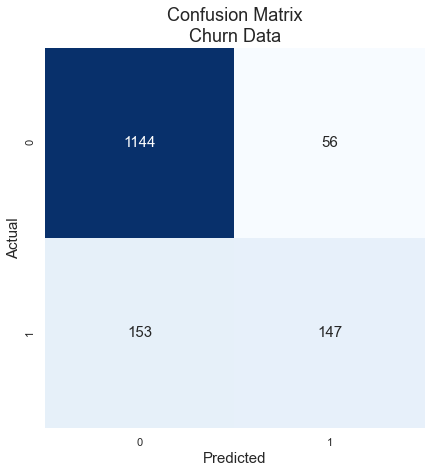

In [39]:
create_confusion_matrix(y_test, predictions)

Looking at the confusion matrix reinforces our previous analysis of the model struggling to correctly classify positive examples.

In [40]:
# check class distribution
y_train.value_counts()

0    5547
1    1453
Name: Exited, dtype: int64

### Model 2 

When looking at the class distribution of our training set, we see a significant skew where most of our data consists of negative (0) examples. To overcome this problem, we could either undesample and majority class or oversample the minority. Undersampling will leave us with less training data so we will generate synthetic examples of our minority class. There are many methods to do this but we will be using ADASYN (Adaptive Synthetic) sampling for this purpose.

In [41]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(**rs)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [42]:
y_train.value_counts()

1    5643
0    5547
Name: Exited, dtype: int64

In [43]:
pipelines2, score2 = training_model(X_train, X_val, X_test, y_train, y_val, y_test)

Logistic Regression
------------------------------
Model Score Validation: 0.2052
Model Score Testing: 0.4665


Naive Bayes
------------------------------
Model Score Validation: 0.4044
Model Score Testing: 0.4562


SVM
------------------------------
Model Score Validation: 0.1113
Model Score Testing: 0.5237


Decision Tree
------------------------------
Model Score Validation: 0.5027
Model Score Testing: 0.4910


Random Forest
------------------------------
Model Score Validation: 0.5302
Model Score Testing: 0.5827


XGBOOST
------------------------------
Model Score Validation: 0.5579
Model Score Testing: 0.5884




In [44]:
score2.sort_values('test_score', ascending=False)

,model,val_score,test_score
5,XGBOOST,0.557898,0.588415
4,Random Forest,0.530168,0.582701
2,SVM,0.111296,0.523737
3,Decision Tree,0.502750,0.491034
0,Logistic Regression,0.205166,0.466488
1,Naive Bayes,0.404406,0.456233


In [45]:
model2 = pipelines2[5]
print(model2['classifier'])
predictions2 = model2.predict(X_test)
print(classification_report(y_test, predictions2))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1200
           1       0.54      0.64      0.59       300

    accuracy                           0.82      1500
   macro avg       0.72      0.75      0.74      1500
weighted avg       0.83      0.82      0.83      1500



Though our f1_score remains comparable to our first training run, we notice a large increase in sensitivity when adding synthetic samples. This is beneficial to us since we would like to be able to detect when a customer will churn.

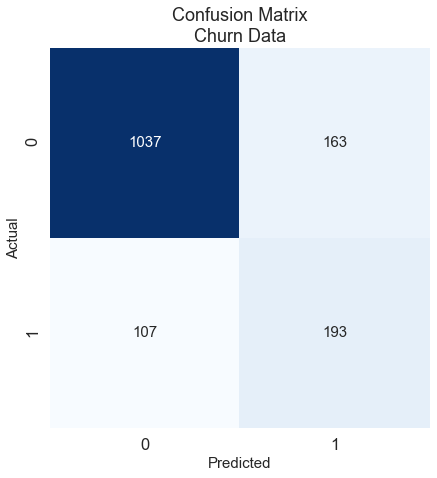

In [46]:
create_confusion_matrix(y_test, predictions2)

A look at the confusion matrix verifies are findings. Model sensitivity has increased although specificity has taken a small hit. This is an acceptable compromise. Let's look at feature importance.

## Feature Importance 

In [48]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model2['classifier'].feature_importances_})
importances.sort_values('Importance', ascending=False, inplace=True)
importances

,Feature,Importance
6,IsActiveMember,0.356627
4,NumOfProducts,0.154535
10,Gender_Male,0.130178
1,Age,0.101988
9,Geography_Spain,0.067475
5,HasCrCard,0.047270
8,Geography_Germany,0.039818
3,Balance,0.031253
2,Tenure,0.025052
7,EstimatedSalary,0.024299


Just like what we saw in the exploratory data analysis, IsActiveMember and NumOfProducts play an important role in determining a churn or not.

## Feature Selection 

In [49]:
from sklearn.feature_selection import SelectFromModel, RFE

### RFE with Logistic Regression Estimator

We will use features selection method with RFE (Recursive Feature Elimination) using Logistic Regression as estimator. We will test the chosen features with our XGBOOST model.

In [50]:
# Feature Selection using RFE with logistic regression
params = [MinMaxScaler(), XGBClassifier(**rs, verbosity=0), X_train, X_val, X_test, y_train, y_val, y_test]

def create_pipeline(feature_selection, scaler, classifier, X_train, X_val, X_test, y_train, y_val, y_test):
    pipeline = Pipeline(steps=[('feature_selection', feature_selection(LogisticRegression(**rs))), ('scaler', scaler), ('classifier', classifier)])
    
    scorer=make_scorer(f1_score)
    pipeline.fit(X_train, y_train)
    chosen_features = X_train.iloc[:, pipeline['feature_selection'].get_support(indices=True)]
    print(f'Feature Selection Method {feature_selection.__name__} selected {len(chosen_features.columns)} features')
    print(f'Model Score Valdiation: {cross_val_score(pipeline, X_val, y_val, scoring=scorer, cv=5).mean():.4f}')
    print(f'Model Score Testing: {f1_score(y_test, pipeline.predict(X_test)):.4f}')
    return pipeline, chosen_features


In [51]:
rfe_pipeline, rfe_features = create_pipeline(RFE, *params)

Feature Selection Method RFE selected 5 features
Model Score Valdiation: 0.3965
Model Score Testing: 0.4733


In [52]:
rfe_features.columns

Index(['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

The RFE method chose 5 features. But the model didn't improve

### Select From Model with Logistic Regression

In [53]:
# feature selection using SelectFromModel with Logistic Regression
sfm_pipeline, sfm_features = create_pipeline(SelectFromModel, *params)

Feature Selection Method SelectFromModel selected 1 features
Model Score Valdiation: 0.1832
Model Score Testing: 0.4909


In [54]:
sfm_features.columns

Index(['Age'], dtype='object')

The SelectFromModel method chose 1 feature. and the model didn't improve. And as we know we can't predict or classify using just one features

### Feature Selection with Feature Importance CutOff 

We will try a different method of feature selection using our model. By getting the cumulative percentage of feature importance, we can set a percentage cutoff after which we will drop all other features. I will set it to 0.9.

In [55]:
# feature selection using feature importance
importances['CumPerc'] = np.cumsum(model2['classifier'].feature_importances_)/sum(model2['classifier'].feature_importances_)
cutoff = 0.9
new_features = importances[importances['CumPerc'] < cutoff]
new_features

,Feature,Importance,CumPerc
6,IsActiveMember,0.356627,0.021506
4,NumOfProducts,0.154535,0.123494
10,Gender_Male,0.130178,0.148546
1,Age,0.101988,0.179798
9,Geography_Spain,0.067475,0.334333
5,HasCrCard,0.047270,0.381603
8,Geography_Germany,0.039818,0.738230
3,Balance,0.031253,0.762529
2,Tenure,0.025052,0.802346
7,EstimatedSalary,0.024299,0.869822


In [56]:
new_features.columns

Index(['Feature', 'Importance', 'CumPerc'], dtype='object')

In [57]:
# new pipeline based on new features
scorer = make_scorer(f1_score)
X_train, X_val, X_test = X_train[new_features['Feature']], X_val[new_features['Feature']], X_test[new_features['Feature']]

fi_pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', XGBClassifier(**rs, verbosity=0))])

fi_pipeline.fit(X_train, y_train)
print(f'Model Score Validation: {cross_val_score(fi_pipeline, X_val, y_val, scoring=scorer, cv=5).mean():.4f}')
print(f'Model Score Test: {f1_score(y_test, fi_pipeline.predict(X_test)):.4f}')


Model Score Validation: 0.5369
Model Score Test: 0.5976


In [58]:
print(classification_report(y_test, fi_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1200
           1       0.54      0.66      0.60       300

    accuracy                           0.82      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.84      0.82      0.83      1500



Sensitivity has increased again. Our model is getting better at detecting churn.

## Hyper Parameter Tuning

We try to put more weight on positive classes to make it more importance

In [59]:
# create a class_weight dict and pass it as an argument when creating the classifier

weight = (y_val == 0).sum() / (y_val==1).sum()
hypertune_pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', XGBClassifier(**rs, verbosity=0, scale_pos_weight=weight))])
hypertune_pipeline.fit(X_train, y_train)
print(f'Model Score Validation: {cross_val_score(hypertune_pipeline, X_val, y_val, scoring=scorer, cv=5).mean():.4f}')
print(f'Model Score Test: {f1_score(y_test, hypertune_pipeline.predict(X_test)):.4f}')

Model Score Validation: 0.5421
Model Score Test: 0.5518


In [60]:
print(classification_report(y_test, hypertune_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1200
           1       0.42      0.79      0.55       300

    accuracy                           0.74      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.74      0.77      1500



Weighting the positive class seems to decrease the model's overall f1_score. Let's check the classification report.

When adding the weight parameter, we are able to make improvements to sensitivity, but specificity takes a large hit. It is debatable whether we would keep a change like this in our model. Using it would certainly allow us to detect more churn among customers but this would be at the cost of an increase in type 1 errors (false positives). I will opt to leave this out moving forward.

## Model Analysis 

We'll be using the Feature Selection Model because it's pretty good and doesn't take much of a hit

In [61]:
test_predictions = fi_pipeline.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1200
           1       0.54      0.66      0.60       300

    accuracy                           0.82      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.84      0.82      0.83      1500



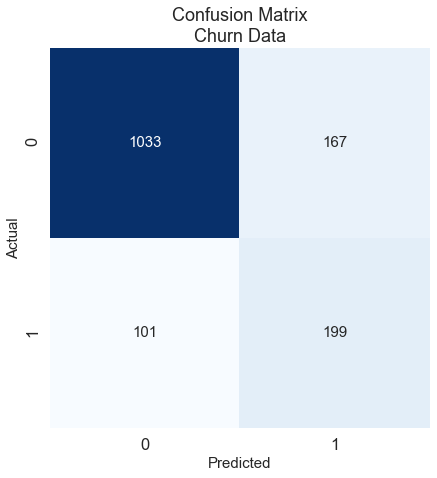

In [62]:
create_confusion_matrix(y_test, test_predictions)

### ROC and AUC Plot 

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

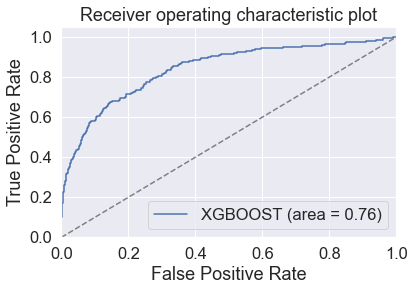

In [64]:
log_roc_auc = roc_auc_score(y_test, test_predictions)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, fi_pipeline.predict_proba(X_test)[:,1])

fig = plt.figure()
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.plot(false_positive_rate, true_positive_rate, label=f'XGBOOST (area = {log_roc_auc:.2f})')
plt.plot([0,1],[0,1], '--', color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic plot")
plt.legend(loc='lower right')
plt.show()

From the above ROC and AUC Plot our model is good enough to differentiate the class. And we can use this model to predict whether the customer will churn or not.

# Predicting The Dataset

We will predict our dataset and put the prediction alongside the real classes

In [65]:
df_predict = df_old.copy()

In [66]:
df_predict.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
def preprocess_dataframe(df):
    df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
    df = pd.get_dummies(df, drop_first=True)
    df = df[new_features['Feature']]
    return df

In [68]:
df_predict_processed = preprocess_dataframe(df_predict)

In [69]:
assert all (df_predict_processed.columns == X_train.columns)

In [70]:
df_predict['predictions'] = fi_pipeline.predict(df_predict_processed)

In [72]:
df_predict.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predictions
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
